In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### First Algorithm

In [2]:
import librosa
import numpy as np
import Levenshtein

def extract_mfcc(audio_path, sr=22050, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1) 
    return mfcc_mean

def mfcc_to_sequence(mfcc_features):
    return ''.join([chr(int(f) % 255) for f in mfcc_features])

def compare_audio(file1, file2):
    mfcc1 = extract_mfcc(file1)
    mfcc2 = extract_mfcc(file2)
    
    seq1 = mfcc_to_sequence(mfcc1)
    seq2 = mfcc_to_sequence(mfcc2)
    
    distance = Levenshtein.distance(seq1, seq2)
    similarity = 1 - (distance / max(len(seq1), len(seq2)))
    
    return similarity

In [3]:
file1 = "videoplayback.wav"
file2 = "videoplayback(1).wav"
similarity_score = compare_audio(file1, file2)
print(f"Musiqi oxşarlıq dərəcəsi: {similarity_score:.2f}")

/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)


Musiqi oxşarlıq dərəcəsi: 0.00


In [4]:
file1 = "videoplayback.wav"
file2 = "videoplayback(2).wav"
similarity_score = compare_audio(file1, file2)
print(f"Musiqi oxşarlıq dərəcəsi: {similarity_score:.2f}")

/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)


Musiqi oxşarlıq dərəcəsi: 0.08


In [5]:
file1 = "videoplayback(1).wav"
file2 = "videoplayback(2).wav"
similarity_score = compare_audio(file1, file2)
print(f"Musiqi oxşarlıq dərəcəsi: {similarity_score:.2f}")

/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/tmp/ipykernel_36361/4242511645.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)


Musiqi oxşarlıq dərəcəsi: 0.15


### Musiqi Oxşarlıq Alqoritmi

In [6]:
import librosa
import numpy as np
import Levenshtein
import scipy.spatial.distance as dist

def extract_features(audio_path, sr=22050, n_mfcc=13, n_chroma=12, n_mels=40):
    """Musiqi faylından MFCC, Chroma və Mel xüsusiyyətlərini çıxarır."""
    y, sr = librosa.load(audio_path, sr=sr, mono=True)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    mel_mean = np.mean(mel, axis=1)
    
    return np.concatenate((mfcc_mean, chroma_mean, mel_mean))

def feature_to_sequence(features):
    """Xüsusiyyətləri ardıcıllıq formatına çevirir."""
    return ''.join([chr(int(f) % 255) for f in features])

def compare_audio(file1, file2):
    """İki musiqi faylının Levenshtein və Kosinus oxşarlığını hesablayır."""
    features1 = extract_features(file1)
    features2 = extract_features(file2)
    
    seq1 = feature_to_sequence(features1)
    seq2 = feature_to_sequence(features2)
    
    levenshtein_distance = Levenshtein.distance(seq1, seq2)
    levenshtein_similarity = 1 - (levenshtein_distance / max(len(seq1), len(seq2)))
    
    cosine_similarity = 1 - dist.cosine(features1, features2)
    
    return levenshtein_similarity, cosine_similarity

In [7]:
file1 = "videoplayback.wav"
file2 = "videoplayback(2).wav"
lev_sim, cos_sim = compare_audio(file1, file2)
print(f"Levenshtein oxşarlıq dərəcəsi: {lev_sim:.2f}")
print(f"Kosinus oxşarlıq dərəcəsi: {cos_sim:.2f}")

/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)


Levenshtein oxşarlıq dərəcəsi: 0.63
Kosinus oxşarlıq dərəcəsi: 0.98


In [8]:
file1 = "videoplayback(1).wav"
file2 = "videoplayback(2).wav"
lev_sim, cos_sim = compare_audio(file1, file2)
print(f"Levenshtein oxşarlıq dərəcəsi: {lev_sim:.2f}")
print(f"Kosinus oxşarlıq dərəcəsi: {cos_sim:.2f}")

/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)


Levenshtein oxşarlıq dərəcəsi: 0.68
Kosinus oxşarlıq dərəcəsi: 1.00


In [9]:
file1 = "videoplayback.wav"
file2 = "videoplayback(1).wav"
lev_sim, cos_sim = compare_audio(file1, file2)
print(f"Levenshtein oxşarlıq dərəcəsi: {lev_sim:.2f}")
print(f"Kosinus oxşarlıq dərəcəsi: {cos_sim:.2f}")

/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/tmp/ipykernel_36361/1724953426.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)


Levenshtein oxşarlıq dərəcəsi: 0.60
Kosinus oxşarlıq dərəcəsi: 0.97


### Musiqi Faylları Arasında Oxşarlıq Ölçülməsi: KNN və Mel Spectrogram Vizualizasiyası

/tmp/ipykernel_36703/3329695742.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/home/abdullah/.local/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_36703/3329695742.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/home/abdullah/.local/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


KNN Oxşarlıq dərəcəsi: 1.00
KNN Məsafəsi: 0.00


/tmp/ipykernel_36703/3329695742.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abdullah/.local/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


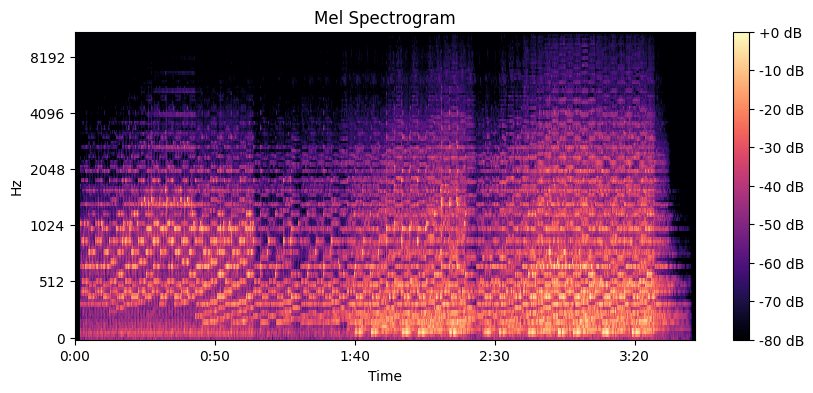

In [9]:
import librosa
import numpy as np
from sklearn.neighbors import NearestNeighbors
import scipy.spatial.distance as dist
import librosa.display
import matplotlib.pyplot as plt

def extract_features_knn(audio_path, sr=22050, n_mfcc=13, n_chroma=12, n_mels=40):
    y, sr = librosa.load(audio_path, sr=sr, mono=True)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    mel_mean = np.mean(mel, axis=1)
    
    return np.concatenate((mfcc_mean, chroma_mean, mel_mean))

def compare_audio_knn(file1, file2):
    features1 = extract_features_knn(file1)
    features2 = extract_features_knn(file2)

    features = np.array([features1, features2])
    nbrs = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(features)
    
    distances, indices = nbrs.kneighbors(features)

    similarity = 1 / (1 + distances[0][0])
    
    return similarity, distances[0][0]

def plot_features(audio_path):
    y, sr = librosa.load(audio_path)
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

file1 = "videoplayback.wav"
file2 = "videoplayback(2).wav"

similarity, distance = compare_audio_knn(file1, file2)
print(f"KNN Oxşarlıq dərəcəsi: {similarity:.2f}")
print(f"KNN Məsafəsi: {distance:.2f}")

plot_features(file1)